# Image and Video Processing Lab 2

## Task I: Familiarization with OpenCV

### Importing Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Loading Image

In [ ]:
img = cv2.imread("starry_night.jpg")

In [ ]:
print(type(img), img.shape, img.dtype)

<class 'numpy.ndarray'> (1014, 1280, 3) uint8


### Display Image

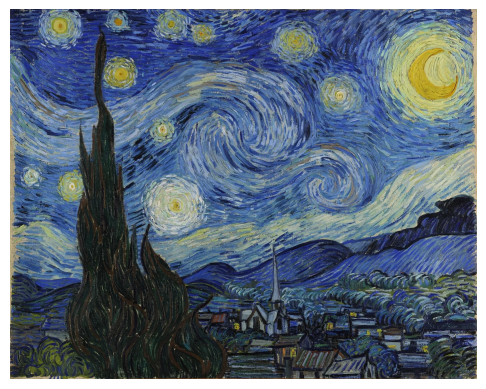

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()

### Image Properties

In [ ]:
print("Shape:", img.shape)
print("Data type:", img.dtype)
print("Pixel range:", img.min(), img.max())

Shape: (1014, 1280, 3)
Data type: uint8
Pixel range: 0 255


### Access Pixels

In [ ]:
pixel = img[100, 100]
print("BGR pixel value:", pixel)

BGR pixel value: [85 42 29]


### Region of Interest

In [ ]:
roi = img[100:300, 200:400]

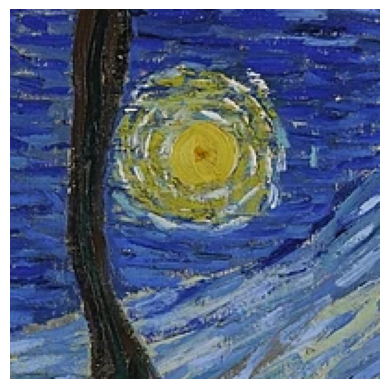

In [ ]:
roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
plt.imshow(roi_rgb)
plt.axis("off")
plt.show()

### Image copy

In [ ]:
img_copy = img.copy()

Creates deep copy of the image

### Resize image

In [ ]:
resized = cv2.resize(img_rgb, (256, 256))

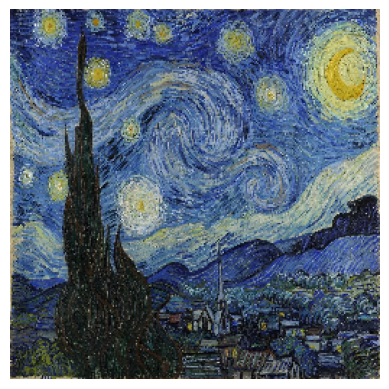

In [ ]:
plt.imshow(resized)
plt.axis('off')
plt.show()

## Task II: Point Operations (Intensity Transformations)

### Convert to Grayscale

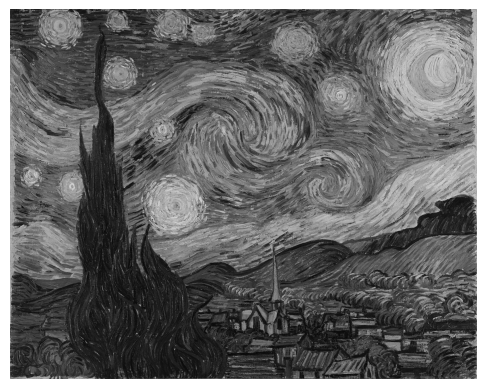

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

### Negative Image (Inversion of Intensity)



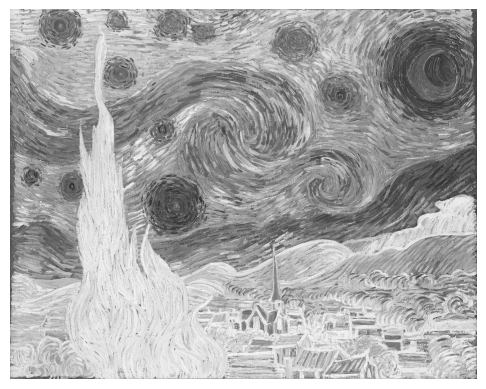

In [ ]:
negative = 255 - gray

plt.imshow(negative, cmap="gray")
plt.axis("off")
plt.show()

### Bright Image

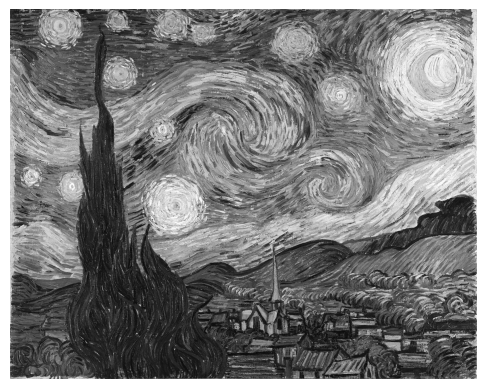

In [ ]:
bright = cv2.add(gray, 50)   # safe addition (clips at 255)

plt.imshow(bright, cmap="gray")
plt.axis("off")
plt.show()

### Contrast Scaling

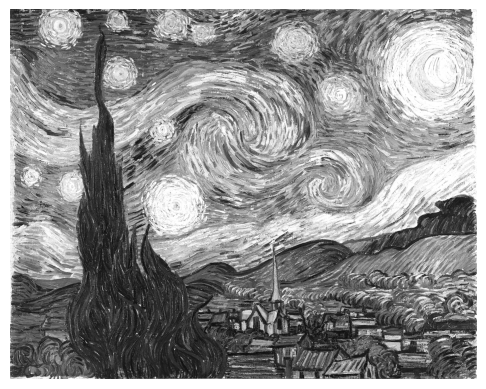

In [ ]:
contrast = cv2.convertScaleAbs(gray, alpha=1.5, beta=0)

plt.imshow(contrast, cmap="gray")
plt.axis("off")
plt.show()

### Combined Brightness and Contrast

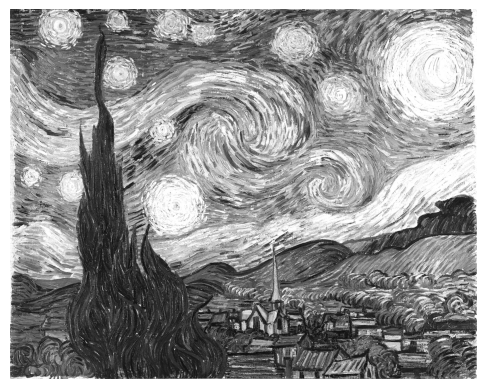

In [ ]:
adjusted = cv2.convertScaleAbs(gray, alpha=1.3, beta=40)

plt.imshow(adjusted, cmap="gray")
plt.axis("off")
plt.show()

### Histogram Visualization

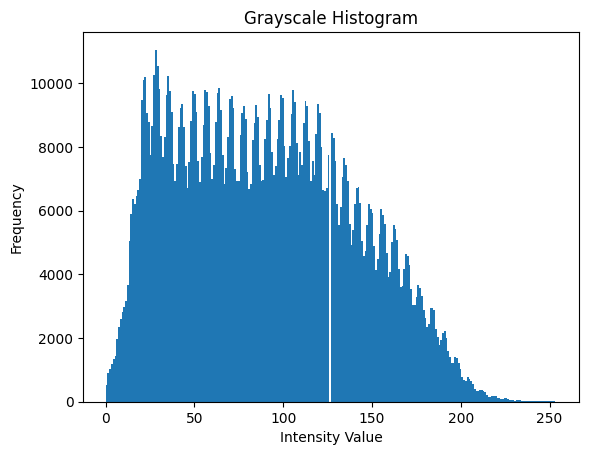

In [ ]:
plt.hist(gray.ravel(), bins=256)
plt.title("Grayscale Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.show()

### Side by side

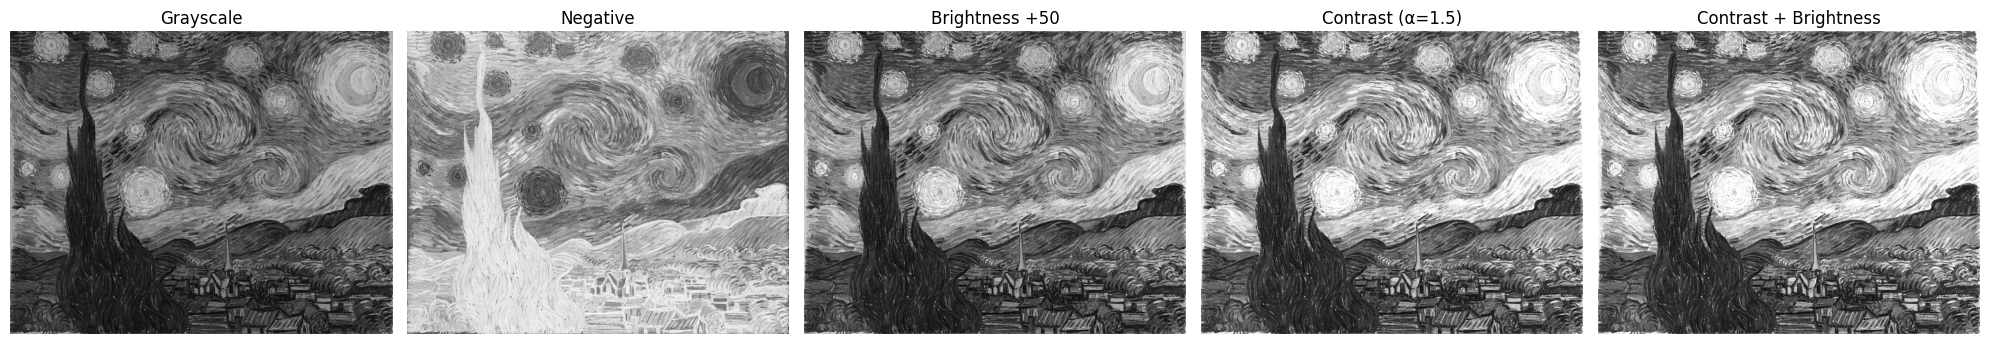

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4))

ax[0].imshow(gray, cmap="gray")
ax[0].set_title("Grayscale")

ax[1].imshow(negative, cmap="gray")
ax[1].set_title("Negative")

ax[2].imshow(bright, cmap="gray")
ax[2].set_title("Brightness +50")

ax[3].imshow(contrast, cmap="gray")
ax[3].set_title("Contrast (α=1.5)")

ax[4].imshow(adjusted, cmap="gray")
ax[4].set_title("Contrast + Brightness")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()


## Task III: Spatial Resolution Reduction

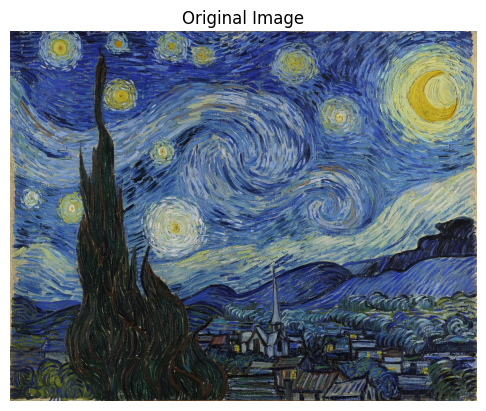

In [ ]:
orig = img.copy()

plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

### Downsampling the Image

In [ ]:
half = cv2.resize(orig, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
quarter = cv2.resize(orig, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)

### Display Reduced Resolution Images

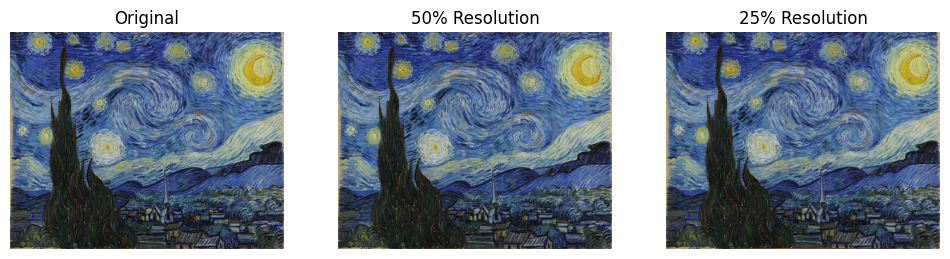

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original")

ax[1].imshow(cv2.cvtColor(half, cv2.COLOR_BGR2RGB))
ax[1].set_title("50% Resolution")

ax[2].imshow(cv2.cvtColor(quarter, cv2.COLOR_BGR2RGB))
ax[2].set_title("25% Resolution")

for a in ax:
    a.axis("off")


### Upscaling Back to Original Size

In [ ]:
half_up = cv2.resize(half, orig.shape[1::-1], interpolation=cv2.INTER_LINEAR)
quarter_up = cv2.resize(quarter, orig.shape[1::-1], interpolation=cv2.INTER_LINEAR)

### Compare Information Loss

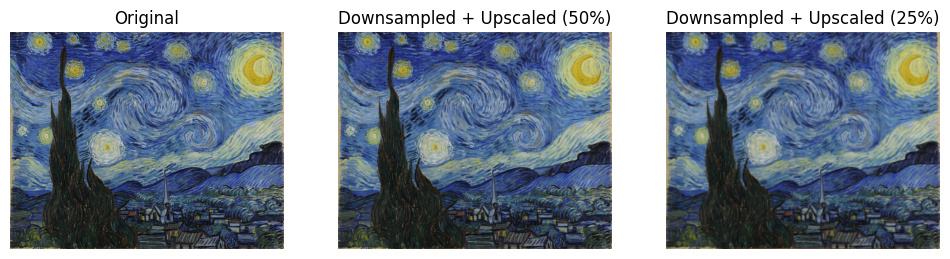

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original")

ax[1].imshow(cv2.cvtColor(half_up, cv2.COLOR_BGR2RGB))
ax[1].set_title("Downsampled + Upscaled (50%)")

ax[2].imshow(cv2.cvtColor(quarter_up, cv2.COLOR_BGR2RGB))
ax[2].set_title("Downsampled + Upscaled (25%)")

for a in ax:
    a.axis("off")

## Task IV: Intensity Resolution Reduction

### Reduce Bit Depth (8-bit → 3-bit)

In [ ]:
levels = 8          # 3-bit → 2^3 = 8 levels
factor = 256 // levels

gray_3bit = (gray // factor) * factor

### Display Reduced Intensity Image

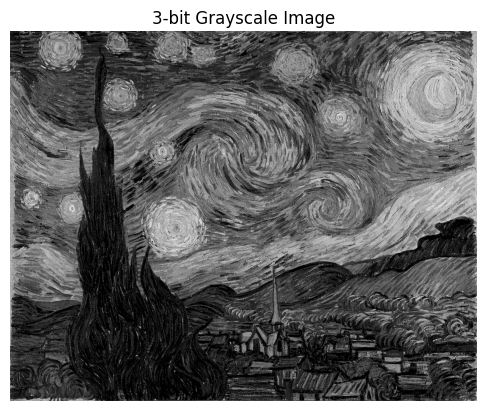

In [ ]:
plt.imshow(gray_3bit, cmap="gray")
plt.title("3-bit Grayscale Image")
plt.axis("off")
plt.show()

### Side by Side Comparison

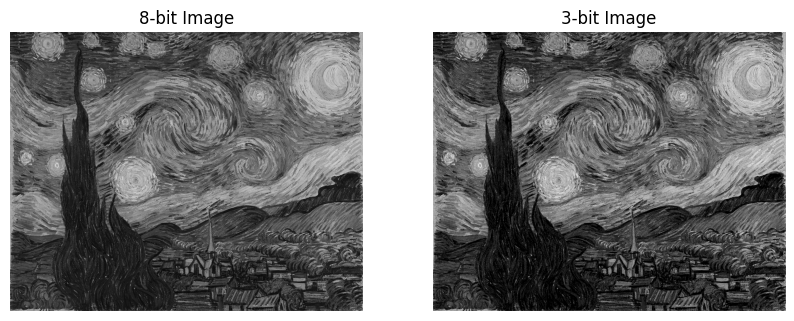

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].imshow(gray, cmap="gray")
ax[0].set_title("8-bit Image")

ax[1].imshow(gray_3bit, cmap="gray")
ax[1].set_title("3-bit Image")

for a in ax:
    a.axis("off")


### Histogram Comparison

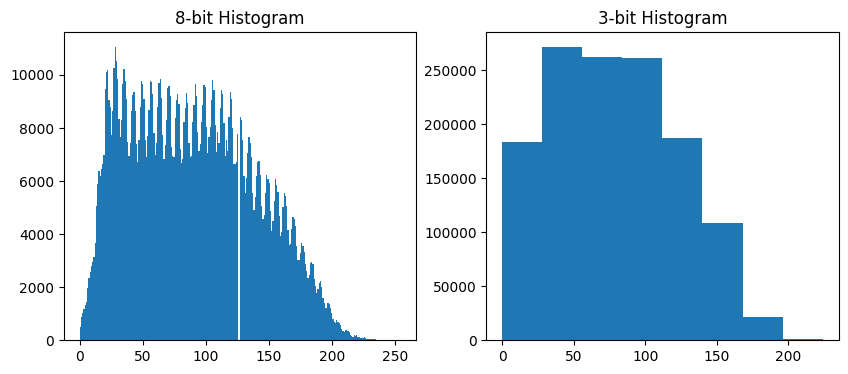

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].hist(gray.ravel(), bins=256)
ax[0].set_title("8-bit Histogram")

ax[1].hist(gray_3bit.ravel(), bins=8)
ax[1].set_title("3-bit Histogram")
plt.show()

## Task V: Color Space Representations (RGB, YCbCr, HSV)

### RGB Representation

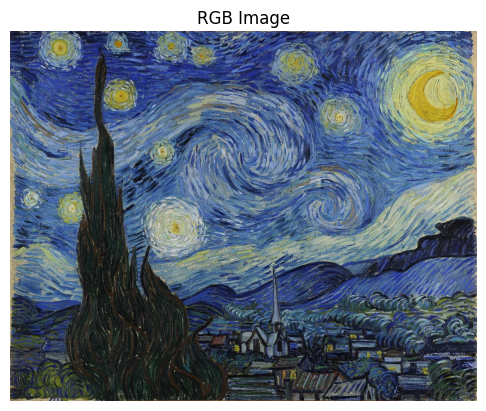

In [ ]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb)
plt.title("RGB Image")
plt.axis("off")
plt.show()

### Split RGB Channels

In [ ]:
R, G, B = cv2.split(rgb)

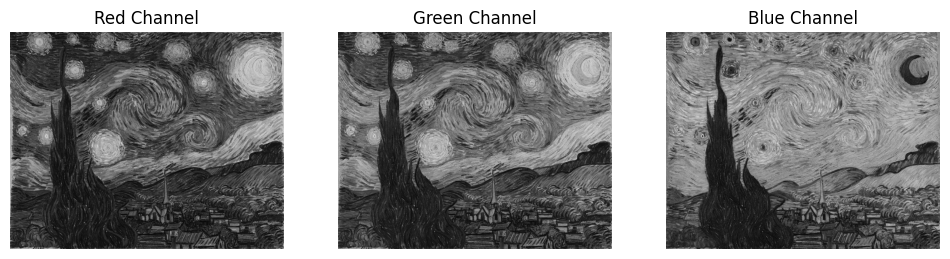

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].imshow(R, cmap="gray")
ax[0].set_title("Red Channel")

ax[1].imshow(G, cmap="gray")
ax[1].set_title("Green Channel")

ax[2].imshow(B, cmap="gray")
ax[2].set_title("Blue Channel")

for a in ax:
    a.axis("off")

### YCbCr Color Space

In [ ]:
ycbcr = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(ycbcr)

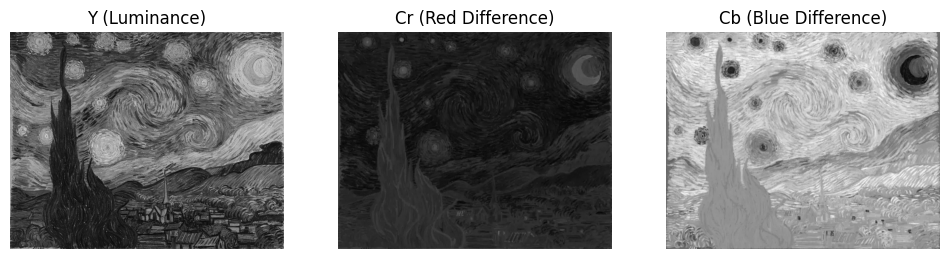

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].imshow(Y, cmap="gray")
ax[0].set_title("Y (Luminance)")

ax[1].imshow(Cr, cmap="gray")
ax[1].set_title("Cr (Red Difference)")

ax[2].imshow(Cb, cmap="gray")
ax[2].set_title("Cb (Blue Difference)")

for a in ax:
    a.axis("off")

### HSV Color Space

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv)

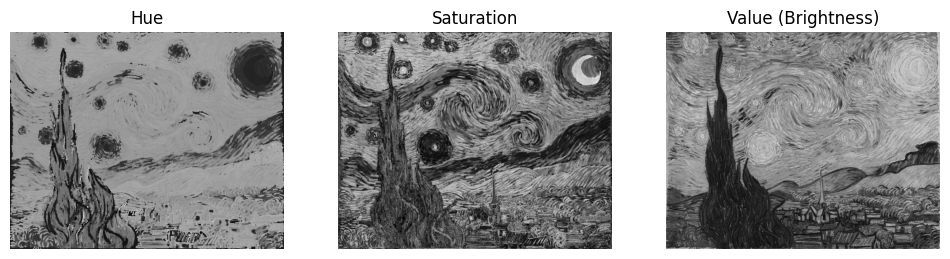

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].imshow(H, cmap="gray")
ax[0].set_title("Hue")

ax[1].imshow(S, cmap="gray")
ax[1].set_title("Saturation")

ax[2].imshow(V, cmap="gray")
ax[2].set_title("Value (Brightness)")

for a in ax:
    a.axis("off")

## Task VI: Binary Image Conversion

### Global Thresholding

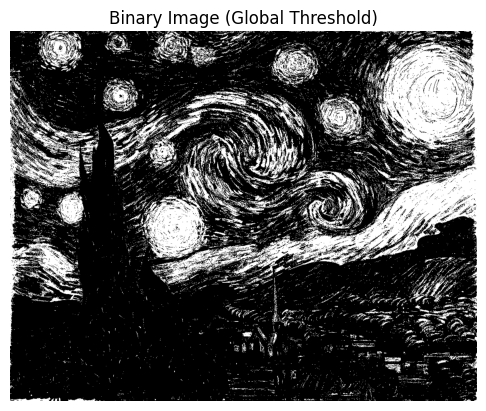

In [ ]:
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(binary, cmap="gray")
plt.title("Binary Image (Global Threshold)")
plt.axis("off")
plt.show()

### Inverse Binary Threshold

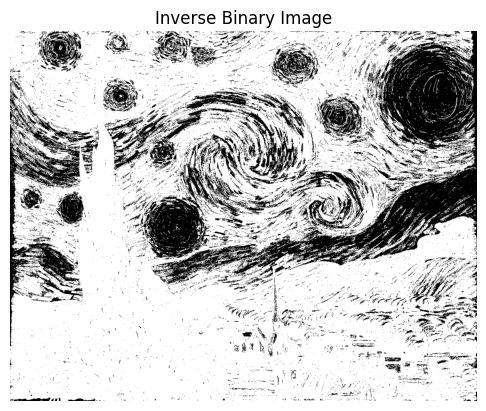

In [ ]:
_, binary_inv = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary_inv, cmap="gray")
plt.title("Inverse Binary Image")
plt.axis("off")
plt.show()

### Threshold Comparison

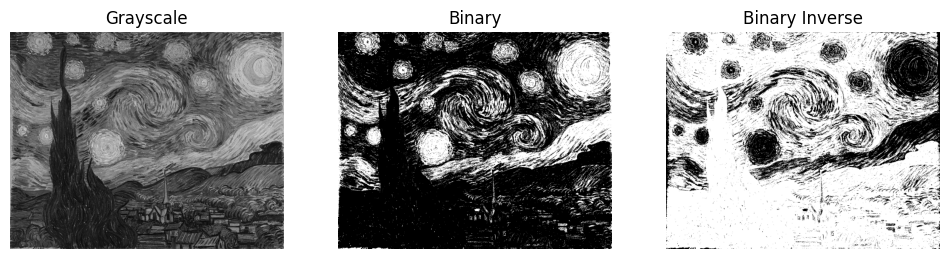

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].imshow(gray, cmap="gray")
ax[0].set_title("Grayscale")

ax[1].imshow(binary, cmap="gray")
ax[1].set_title("Binary")

ax[2].imshow(binary_inv, cmap="gray")
ax[2].set_title("Binary Inverse")

for a in ax:
    a.axis("off")

### Histogram Insight

Text(0, 0.5, 'Frequency')

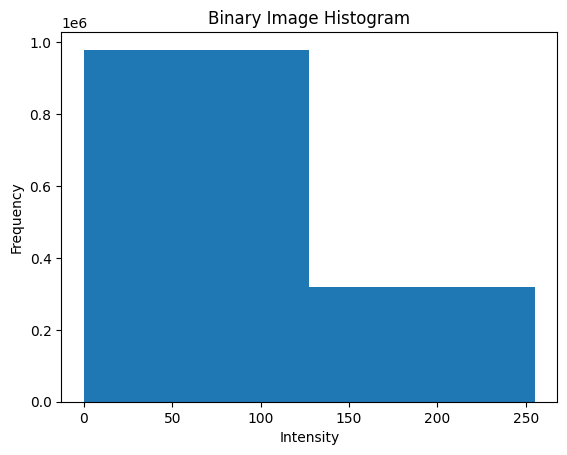

In [ ]:
plt.hist(binary.ravel(), bins=2)
plt.title("Binary Image Histogram")
plt.xlabel("Intensity")
plt.ylabel("Frequency")